## Preprocessing

In [23]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [24]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

In [25]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [26]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [27]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE

application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = application_type_counts[application_type_counts < 500].index.tolist()


# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [28]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_value_counts = application_df['CLASSIFICATION'].value_counts()
classification_value_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [29]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts_gt_1 = classification_value_counts.loc[classification_value_counts > 1]
classification_counts_gt_1

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [30]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classification_counts_type = dict(application_df['CLASSIFICATION'].value_counts())

classifications_to_replace = [x for x in classification_counts_type if classification_counts_type[x] < 1000]
classifications_to_replace

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [31]:
# Convert categorical data to numeric with `pd.get_dummies`
df_application_dummies = pd.get_dummies(application_df, columns=['APPLICATION_TYPE', 'AFFILIATION','CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'])
df_application_dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [32]:
# Split our preprocessed data into our features and target arrays
y = df_application_dummies['IS_SUCCESSFUL'].values
X = df_application_dummies.drop(columns='IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [33]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [34]:
print(X_train_scaled[:1])
print(X_test_scaled[:1])

[[ 0.00881785 -0.03350638 -0.08984839 -0.12710794 -0.1789267  -1.92492152
   4.55463685 -0.18609076 -0.19345643 -0.14559838 -0.14753563  1.08559801
  -0.04278355 -1.07815005 -0.03180805 -0.01247081 -0.02068331 -1.01314816
  -0.40559688 -0.45959239 -0.24297457 -0.24261548  3.74743577 -0.10622042
  -0.06671871 -0.00881785 -2.12551253  2.24497561  1.53422494 -0.12030512
  -0.03473549 -1.4793237   0.63693254 -0.14601549 -0.12551965 -0.33092365
  -0.08132151 -0.1687197  -0.35039899 -0.06671871 -0.07423929  0.02789425
  -0.02789425]]
[[ 0.00881785 -0.0333797  -0.08984839 -0.12710794 -0.1789267   0.5195017
  -0.21955647 -0.18609076 -0.19345643 -0.14559838 -0.14753563 -0.92115128
  -0.04278355  0.92751468 -0.03180805 -0.01247081 -0.02068331  0.98702247
  -0.40559688 -0.45959239 -0.24297457 -0.24261548 -0.26684914 -0.10622042
  -0.06671871 -0.00881785  0.47047476 -0.44543914 -0.65179491 -0.12030512
  -0.03473549  0.67598457 -1.57002498 -0.14601549 -0.12551965 -0.33092365
  -0.08132151 -0.168719

## Compile, Train and Evaluate the Model


In [38]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.


# Model 3 Optimization: Regularization, Hyperparameter Tuning, and Early Stopping for Improved Performance

# Import necessary libraries
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


# Define model architecture
nn = tf.keras.models.Sequential()


# Input Layer
nn.add(tf.keras.layers.Dense(
    units=256, 
    input_dim=X_train_scaled.shape[1], 
    activation='relu', 
    kernel_regularizer=regularizers.l2(0.01)
))
nn.add(tf.keras.layers.Dropout(0.5))  # 50% dropout rate
 

# First Hidden Layer with L2 Regularization and Dropout
nn.add(tf.keras.layers.Dense(
    units=128, 
    activation='relu', 
    kernel_regularizer=regularizers.l2(0.001)
))
nn.add(tf.keras.layers.Dropout(0.4))  # 50% dropout rate

# Second Hidden Layer with L2 Regularization and Dropout
nn.add(tf.keras.layers.Dense(
    units=64, 
    activation='relu', 
    kernel_regularizer=regularizers.l2(0.001)
))
nn.add(tf.keras.layers.Dropout(0.4))  # 50% dropout rate


# Third Hidden Layer with L2 Regularization
nn.add(tf.keras.layers.Dense(
    units=32, 
    activation='relu', 
    kernel_regularizer=regularizers.l2(0.001)
))

In [39]:
# Output Layer (Binary Classification)
nn.add(tf.keras.layers.Dense(
    units=1, 
    activation='sigmoid'
))


# Compile Model
nn.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001), 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

In [45]:
# Define Early Stopping and Learning Rate Reduction Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=10, 
    min_lr=0.0001
)


# Train Model with Callbacks
history = nn.fit(
    X_train_scaled, 
    y_train, 
    epochs=150, 
    batch_size=32, 
    validation_split=0.2, 
    callbacks=[early_stopping, lr_scheduler]
)


# Evaluate Model on Test Data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test Loss: {model_loss:.4f}, Test Accuracy: {model_accuracy*100:.2f}%")

Epoch 1/150
644/644 [==============================] - 1s 1ms/step - loss: 0.5630 - accuracy: 0.7373 - val_loss: 0.5662 - val_accuracy: 0.7329 - lr: 1.0000e-05
Epoch 2/150
644/644 [==============================] - 1s 1ms/step - loss: 0.5640 - accuracy: 0.7344 - val_loss: 0.5663 - val_accuracy: 0.7329 - lr: 1.0000e-05
Epoch 3/150
644/644 [==============================] - 1s 1ms/step - loss: 0.5639 - accuracy: 0.7365 - val_loss: 0.5664 - val_accuracy: 0.7329 - lr: 1.0000e-05
Epoch 4/150
644/644 [==============================] - 1s 1ms/step - loss: 0.5616 - accuracy: 0.7363 - val_loss: 0.5664 - val_accuracy: 0.7335 - lr: 1.0000e-05
Epoch 5/150
644/644 [==============================] - 1s 1ms/step - loss: 0.5629 - accuracy: 0.7366 - val_loss: 0.5662 - val_accuracy: 0.7335 - lr: 1.0000e-05
Epoch 6/150
644/644 [==============================] - 1s 1ms/step - loss: 0.5633 - accuracy: 0.7348 - val_loss: 0.5662 - val_accuracy: 0.7335 - lr: 1.0000e-05
Epoch 7/150
644/644 [===================

In [46]:
# Evaluate model performance on test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Print evaluation results
print(f"Test Loss: {model_loss:.4f}, Test Accuracy: {model_accuracy*100:.2f}%")


268/268 - 0s - loss: 0.5734 - accuracy: 0.7214 - 112ms/epoch - 418us/step
Test Loss: 0.5734, Test Accuracy: 72.14%


In [47]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization_V2.h5")

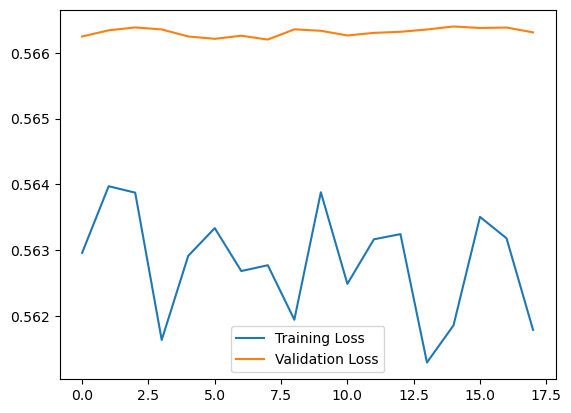

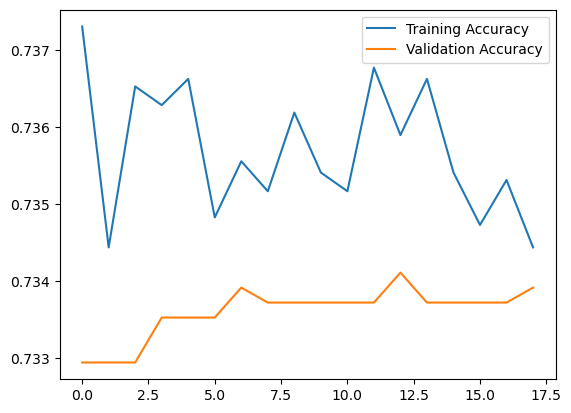

In [48]:
# Plot Training and Validation Loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()